# Chapter 09 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

 Load required packages

In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

 Example: Delta Wire

 Prepare data

In [3]:
delta_wire = pd.DataFrame({
    "training": [0, 100, 250, 375, 525, 750, 875, 1100, 1300, 1450, 1660, 1900, 2300, 2600,
                 2850, 3150, 3500, 4000],
    "productivity": [70_000, 70_350, 70_500, 72_600, 74_000, 76_500, 77_000, 77_400, 77_900,
                     77_200, 78_900, 81_000, 82_500, 84_000, 86_500, 87_000, 88_600, 90_000],
})
delta_wire

,training,productivity
0,0,70000
1,100,70350
2,250,70500
3,375,72600
4,525,74000
5,750,76500
6,875,77000
7,1100,77400
8,1300,77900
9,1450,77200


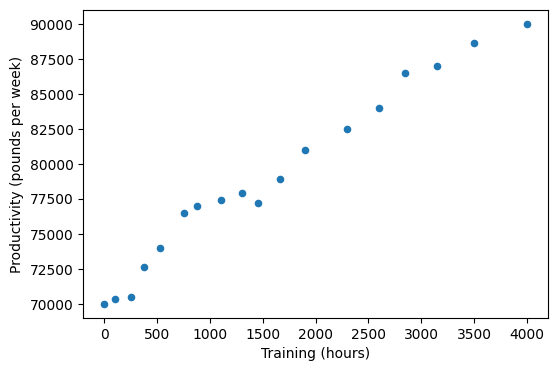

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
delta_wire.plot.scatter(x="training", y="productivity", ax=ax)
ax.set_xlabel("Training (hours)")
ax.set_ylabel("Productivity (pounds per week)")
plt.show()

# Example: PEFR vs cotton dust

 Load data

In [5]:
pefr = pd.read_csv("pefr.txt", sep="\t")
pefr

,exposure,pefr
0,0,390
1,0,410
2,0,430
3,0,460
4,1,420
...,...,...
117,22,450
118,22,490
119,22,500
120,23,370


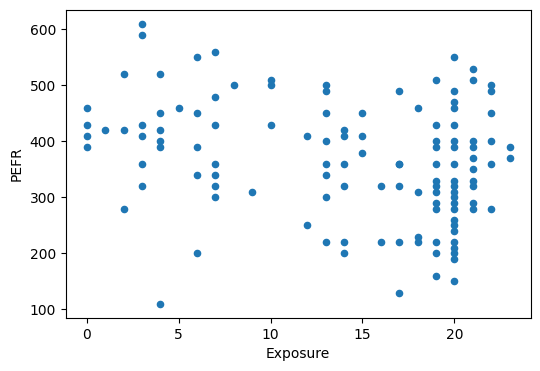

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
pefr.plot.scatter(x="exposure", y="pefr", ax=ax)
ax.set_xlabel("Exposure")
ax.set_ylabel("PEFR")
plt.show()

# Example: Baseball payroll

In [7]:
baseball = pd.read_csv("baseball_payroll.csv")
baseball.head()

,Team Name,Average Payroll (Million),Total Wins
0,Yankees,216.10,279
1,Red Sox,146.66,276
2,Mets,127.40,273
3,Dodgers,119.57,254
4,Cubs,115.16,248


 Visualize using a scatterplot

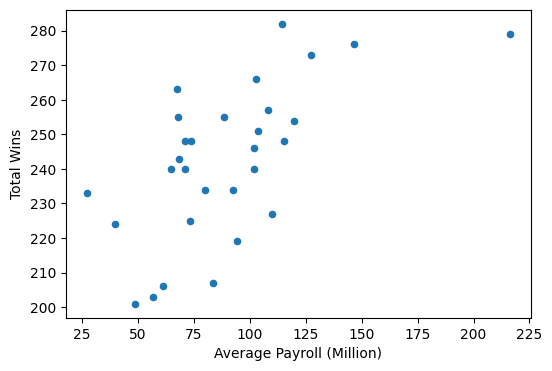

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
baseball.plot.scatter(x="Average Payroll (Million)", y="Total Wins", ax=ax)
ax.set_xlabel("Average Payroll (Million)")
ax.set_ylabel("Total Wins")
plt.show()

 Calculate the vector product sum

In [9]:
product_sum = np.sum(baseball["Average Payroll (Million)"] * baseball["Total Wins"])
print(product_sum.round(0))

668620.0


 Implement resampling procedure

In [10]:
rng = np.random.default_rng(seed=123)
vector_1 = list(baseball["Average Payroll (Million)"])
vector_2 = list(baseball["Total Wins"])
product_sums = []
for _ in range(1000):
    rng.shuffle(vector_2)
    product_sums.append(np.sum(np.array(vector_1) * np.array(vector_2)))
product_sums = np.array(product_sums)
count_above = np.sum(product_sums >= product_sum)
p_value = count_above / len(product_sums)
ci_interval = np.percentile(product_sums, [2.5, 97.5])
print("count above =", count_above)
print("p-value =", p_value)
print("95% CI =", ci_interval)

count above = 0
p-value = 0.0
95% CI = [645987.156 662111.056]


 Create histogram of shuffled product sums

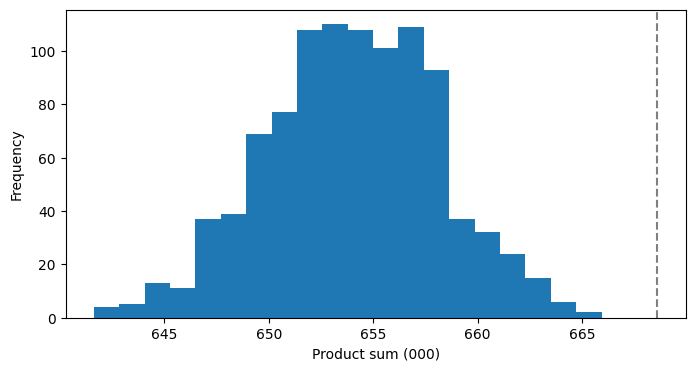

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(product_sums / 1000, bins=20)
ax.axvline(product_sum / 1000, color="grey", linestyle="--")
ax.set_xlabel("Product sum (000)")
ax.set_ylabel("Frequency")
plt.show()

# Example: dating site

 Prepare data

In [12]:
time_spent = [10.1, 67.3, 34.0, 2.9, 126.3, 39.0, 4.6, 211.3]
satisfaction = [2, 7, 2, 1, 9, 8, 1, 6]
data = pd.DataFrame({
    "time spent": time_spent,
    "satisfaction": satisfaction,
})
data

,time spent,satisfaction
0,10.1,2
1,67.3,7
2,34.0,2
3,2.9,1
4,126.3,9
5,39.0,8
6,4.6,1
7,211.3,6


 Resampling procedure for vector sums

In [13]:
random.seed(123)

def vector_sum(x, y):
    return np.sum(np.array(x) * np.array(y))
observed = vector_sum(time_spent, satisfaction)
resampled = []
for _ in range(1000):
    random.shuffle(satisfaction)
    resampled.append(vector_sum(time_spent, satisfaction))
resampled = np.array(resampled)
count_above = np.sum(resampled >= observed)
p_value = count_above / len(resampled)
ci_interval = np.percentile(resampled, [2.5, 97.5])
print("count above =", count_above)
print("p-value =", p_value)
print("95% CI =", ci_interval)

count above = 59
p-value = 0.059
95% CI = [1115.46 3399.8 ]


 Create histogram of shuffled product sums

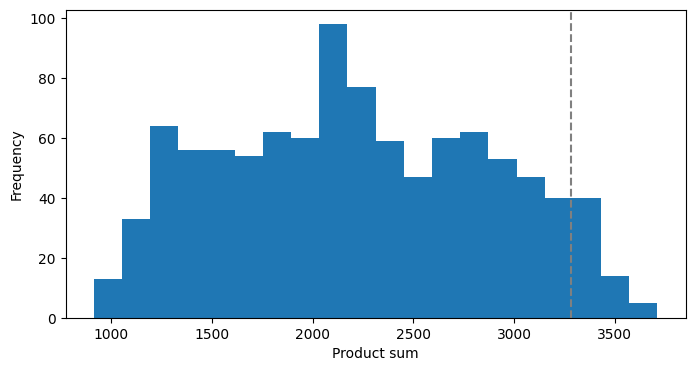

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(resampled, bins=20)
ax.axvline(observed, color="grey", linestyle="--")
ax.set_xlabel("Product sum")
ax.set_ylabel("Frequency")
plt.show()

# Correlation Coefficient

 Calculate correlation coefficient (custom function)

In [15]:
def correlation_coefficient(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    x_sd = np.std(x, ddof=1)
    y_sd = np.std(y, ddof=1)
    return np.sum((x - x_bar) * (y - y_bar)) / ((len(x) - 1) * x_sd * y_sd)
print(correlation_coefficient(baseball["Average Payroll (Million)"], baseball["Total Wins"]))
print(correlation_coefficient(pefr["pefr"], pefr["exposure"]))
print(correlation_coefficient(delta_wire["training"], delta_wire["productivity"]))

0.6334573297712216
-0.2770217010684071
0.9881351391810904


 Calculate using pandas

In [16]:
print(baseball["Average Payroll (Million)"].corr(baseball["Total Wins"]))
print(pefr["pefr"].corr(pefr["exposure"]))
print(delta_wire["training"].corr(delta_wire["productivity"]))

0.6334573297712215
-0.2770217010684072
0.9881351391810905


 Calculate using numpy; numpy creates a matrix of correlation coefficients

In [17]:
print(np.corrcoef(baseball["Average Payroll (Million)"], baseball["Total Wins"])[0, 1])
print(np.corrcoef(pefr["pefr"], pefr["exposure"])[0, 1])
print(np.corrcoef(delta_wire["training"], delta_wire["productivity"])[0, 1])

0.6334573297712215
-0.2770217010684072
0.9881351391810905


 Calculate using scipy; scipy returns a tuple of correlation coefficient and p-value

In [18]:
print(stats.pearsonr(baseball["Average Payroll (Million)"], baseball["Total Wins"])[0])
print(stats.pearsonr(pefr["pefr"], pefr["exposure"])[0])
print(stats.pearsonr(delta_wire["training"], delta_wire["productivity"])[0])

0.6334573297712216
-0.2770217010684074
0.9881351391810904


# Resampling using correlation coefficient

 Implement resampling procedure

In [19]:
random.seed(123)
vector_1 = list(baseball["Average Payroll (Million)"])
vector_2 = list(baseball["Total Wins"])
observed = np.corrcoef(vector_1, vector_2)[0, 1]
resamples = []
for _ in range(1000):
    random.shuffle(vector_1)
    resamples.append(np.corrcoef(vector_1, vector_2)[0, 1])
resamples = np.array(resamples)
ci_interval = np.percentile(resamples, [2.5, 97.5])
p_value = np.mean(resamples >= observed)
print(f"Observed correlation coefficient:{observed:.2f}")
print(f"95% confidence interval: {ci_interval.round(2)}")
print(f"p-value: {p_value:.3f}")

Observed correlation coefficient:0.63
95% confidence interval: [-0.37  0.36]
p-value: 0.000


 Visualize the resampling distribution

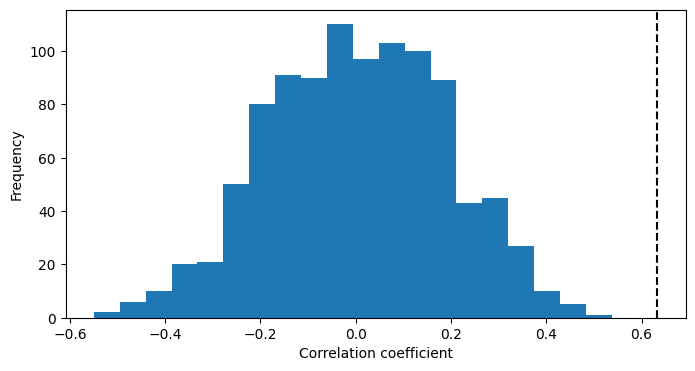

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(resamples, bins=20)
ax.axvline(observed, color="black", linestyle="dashed")
ax.set_xlabel("Correlation coefficient")
ax.set_ylabel("Frequency")
plt.show()

# Coincidence

 Prepare the data for 2021; source of data: 

In [21]:
data = pd.read_csv("state-murder-rate.csv")
subset = data[data["YEAR"] == 2021]
subset = subset.sort_values("STATE", ignore_index=True)

 Visualize using scatterplot adding trendline

Correlation coefficient: -0.21


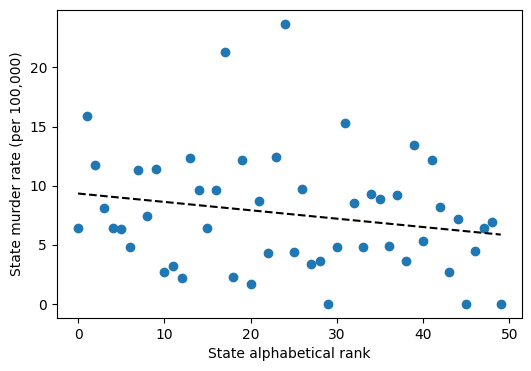

In [22]:
# use numpy to calculate a linear fit
z = np.polyfit(subset.index, subset["RATE"], 1)
p = np.poly1d(z)
corrcoef = np.corrcoef(subset.index, subset["RATE"])[0][1]

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(subset.index, subset["RATE"])
ax.plot(subset.index, p(subset.index), color="black", linestyle="--")
ax.set_xlabel("State alphabetical rank")
ax.set_ylabel("State murder rate (per 100,000)")
print(f"Correlation coefficient: {corrcoef:.2f}")
plt.show()

# Example: Tax rates and revenue (hypothetical)

 Prepare and visualize data

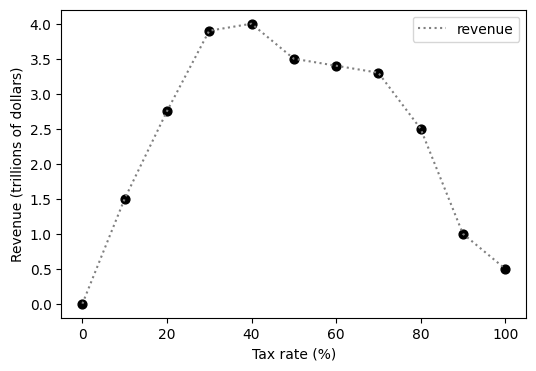

In [23]:
data = pd.DataFrame({
    "tax rate": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "revenue": [0, 1.5, 2.75, 3.9, 4, 3.5, 3.4, 3.3, 2.5, 1, 0.5],
})
fig, ax = plt.subplots(figsize=(6, 4))
data.plot(x="tax rate", y="revenue", ax=ax, linestyle=":", color="grey")
data.plot.scatter(x="tax rate", y="revenue", ax=ax,
                  s=40, color="black", legend=False)
ax.set_xlabel("Tax rate (%)")
ax.set_ylabel("Revenue (trillions of dollars)")
plt.show()